In [1]:
%load_ext autoreload

%autoreload 2

# Load Packages

In [2]:
from uacqr import uacqr
from helper import generate_data
from experiment import experiment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functools import partial

# Define Data Generating Process

In a conditional gaussian setting, set the conditional expectation and the conditional noise

In [4]:
def cond_exp(x):
    return np.sin(1/(x[:,0]**3))

def noise_sd_fn(x):
    return 1*x[:,0]**2

In [5]:
x_dist = partial(np.random.beta, a=1.2, b=0.8)

In [6]:
n=100
T=800 # number of test points
p=1
n0 = int(n/2) # number of training points

# Figure 4

In [7]:
nn_params = {'dropout':0, 'epochs':1000, 'hidden_size':100, 'lr':1e-3, 'batch_norm':True, 
             'batch_size':2, 'normalize':True, 'weight_decay':0, 'epoch_model_tracking':True, 
             "running_batch_norm":True, "train_first_batch_norm":True, "use_gpu":False}

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
CPU times: user 52min 54s, sys: 3.05 s, total: 52min 57s
Wall time: 52min 58s


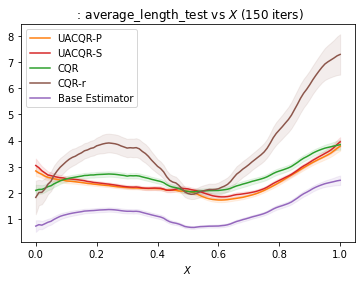

In [8]:
%%time
sim_results = experiment(cond_exp=cond_exp, noise_sd_fn=noise_sd_fn, x_dist=x_dist, n=n, p=p, T=T, 
           var_name='p', var_list=[1], 
           fast_uacqr=True, model_type='neural_net', S=150, B=999, fixed_model_params=nn_params,
                metric='average_length_test', uacqrs_agg='std',
                        extraneous_quantiles=['mean'], random_state=0, local_metric=True)

sim_results.plot(metric='average_length_test', title_prefix=' ')

In [9]:
sim_results.save('figure_4.pkl')

In [10]:
sim_results = experiment(file_name='figure_4.pkl')

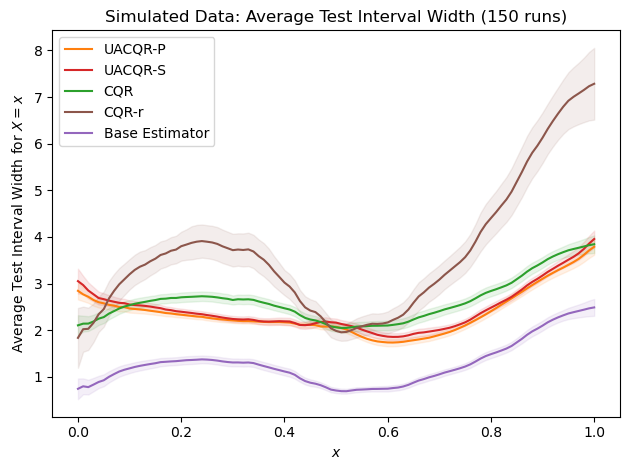

In [12]:
sim_results.plot(metric='average_length_test', custom_title='Simulated Data: Average Test Interval Width (150 runs)')
plt.xlabel('$x$')
plt.ylabel('Average Test Interval Width for $X=x$')
plt.tight_layout()
plt.savefig('figure_4.pdf')